## Input Data

In [1]:
import atlite
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import time
from shapely.geometry import Point
import matplotlib.pyplot as plt
from enum import Enum

# Resources Paths
paths = {"era5_eu_2013": "resources/europe-2013-era5.nc",
         "era5_tutorial": "resources/europe-2013-era5-tutorial.nc",
         "offshore_shape": "resources/regions_offshore_elec_s_37.geojson",
         "onshore_shape": "resources/regions_onshore_elec_s_37.geojson",
         "capfacs": "resources/capfacs_37.csv"}

The ***europe-2013-era5.nc*** NetCDF4 file contains the Era5 data consisting of <code>height</code>, <code>wnd100m</code>, <code>roughness</code>, <code>influx_toa</code>, <code>influx_direct</code>, <code>influx_diffuse</code>, <code>albedo</code>, <code>temperature</code>, <code>soiltemperature</code> and <code>runoff</code>. The data is spatially distributed by 0.3° longitude and latitude and hourly time resolution. For a description of the variables see the [documentation](https://pypsa-eur.readthedocs.io/en/latest/preparation/build_cutout.html)

In [2]:
era_data = xr.open_dataset(filename_or_obj=paths["era5_eu_2013"], engine="netcdf4")
era_data

<xarray.Dataset>
Dimensions:           (x: 157, y: 131, time: 8760)
Coordinates:
  * x                 (x) float64 -12.0 -11.7 -11.4 -11.1 ... 34.2 34.5 34.8
  * y                 (y) float64 33.0 33.3 33.6 33.9 ... 71.1 71.4 71.7 72.0
  * time              (time) datetime64[ns] 2013-01-01 ... 2013-12-31T23:00:00
    lon               (x) float64 ...
    lat               (y) float64 ...
Data variables:
    height            (y, x) float32 ...
    wnd100m           (time, y, x) float32 ...
    roughness         (time, y, x) float32 ...
    influx_toa        (time, y, x) float32 ...
    influx_direct     (time, y, x) float32 ...
    influx_diffuse    (time, y, x) float32 ...
    albedo            (time, y, x) float32 ...
    temperature       (time, y, x) float32 ...
    soil temperature  (time, y, x) float32 ...
    runoff            (time, y, x) float32 ...
Attributes:
    module:             era5
    prepared_features:  ['runoff', 'height', 'wind', 'influx', 'temperature']
    chunksize_time:     100
    dx:                 0.3
    dy:                 0.3

In [3]:
# era_data["height"].sel(x= 34.5, y="33.0")
# xyz = era_data["wnd100m"].sel(x=34.5, y=33.0)
# xyz.values[0]

In [4]:
era_cutout = atlite.Cutout(paths["era5_eu_2013"])
era_cutout

<Cutout "europe-2013-era5">
 x = -12.00 ⟷ 34.80, dx = 0.30
 y = 33.00 ⟷ 72.00, dy = 0.30
 time = 2013-01-01 ⟷ 2013-12-31, dt = H
 module = era5
 prepared_features = ['height', 'wind', 'influx', 'temperature', 'runoff']

The ***regions_onshore_elec_s_37.geojson*** and ***regions_offshore_elec_s_37.geojson*** file describes the shape of the different clusters/voronoi cells. Here there are only 37 cells which corresponds to the country borders.

In [5]:
gdf_onshore = gpd.read_file(paths["onshore_shape"])
gdf_onshore

,name,geometry
0,AL0 0,"POLYGON ((20.32207 39.91318, 20.39703 39.81809..."
1,AT0 0,"POLYGON ((14.94402 46.83544, 15.00447 46.63686..."
2,BA0 0,"POLYGON ((17.62996 45.15735, 17.68474 45.16396..."
3,BE0 0,"POLYGON ((5.71028 49.53109, 5.67555 49.53781, ..."
4,BG0 0,"POLYGON ((24.00074 41.46414, 23.94989 41.43758..."
5,CH0 0,"POLYGON ((6.85093 46.04965, 6.84855 46.08504, ..."
6,CZ0 0,"POLYGON ((16.91052 48.63078, 16.89667 48.69698..."
7,DE0 0,"MULTIPOLYGON (((8.45827 47.63988, 8.51493 47.6..."
8,DK0 0,"MULTIPOLYGON (((9.61036 54.90323, 9.62993 54.9..."
9,DK4 0,"POLYGON ((11.71762 55.92084, 11.66310 55.90717..."


In [6]:
gdf_onshore.explore(legend=True)

In [7]:
gdf_offshore = gpd.read_file(paths["offshore_shape"])
gdf_offshore

,name,geometry
0,AL0 0,"POLYGON ((19.98542 39.69475, 20.01003 39.69120..."
1,BE0 0,"POLYGON ((3.25367 51.34858, 3.10403 51.31485, ..."
2,BG0 0,"POLYGON ((29.34583 42.24111, 28.32389 41.99778..."
3,DE0 0,"MULTIPOLYGON (((14.22389 53.70083, 13.95916 53..."
4,DK0 0,"POLYGON ((9.99277 55.70499, 10.04583 55.75027,..."
5,DK4 0,"MULTIPOLYGON (((12.93400 54.83381, 12.74997 54..."
6,EE6 0,"POLYGON ((23.72555 58.74471, 23.53527 58.74180..."
7,ES0 0,"MULTIPOLYGON (((-5.36028 35.91625, -5.39555 35..."
8,ES2 0,"POLYGON ((1.87083 37.64028, 1.73314 37.62605, ..."
9,FI4 0,"MULTIPOLYGON (((23.43159 59.95382, 23.56135 59..."


In [8]:
gdf_offshore.explore(legend=True)

The ***The capfacs_37.csv*** file describes the capacity factors for every country (37 nodes) for the year 2013 in an hourly resolution.

In [9]:
df = pd.read_csv(paths["capfacs"])
df

,snapshot,AL0 0 offwind-ac,AL0 0 onwind,AL0 0 solar,AT0 0 onwind,AT0 0 ror,AT0 0 solar,BA0 0 onwind,BA0 0 solar,BE0 0 offwind-ac,...,SE4 0 onwind,SE4 0 ror,SE4 0 solar,SI0 0 offwind-ac,SI0 0 onwind,SI0 0 ror,SI0 0 solar,SK0 0 onwind,SK0 0 ror,SK0 0 solar
0,2013-01-01 00:00:00,0.003291,0.001469,0.0,0.163262,0.224456,0.0,0.007340,0.0,1.000000,...,0.459609,0.626955,0.0,0.000000,0.055146,0.344668,0.0,0.361009,0.106197,0.0
1,2013-01-01 01:00:00,0.002103,0.000000,0.0,0.171340,0.224369,0.0,0.007939,0.0,0.999998,...,0.463265,0.625502,0.0,0.000000,0.052605,0.344657,0.0,0.368912,0.106012,0.0
2,2013-01-01 02:00:00,0.000000,0.000000,0.0,0.171035,0.224300,0.0,0.007829,0.0,0.993941,...,0.463777,0.624810,0.0,0.000000,0.052222,0.344593,0.0,0.382949,0.105968,0.0
3,2013-01-01 03:00:00,0.000000,0.000000,0.0,0.169685,0.224249,0.0,0.005766,0.0,0.916094,...,0.463041,0.623794,0.0,0.000000,0.050762,0.344626,0.0,0.388344,0.106215,0.0
4,2013-01-01 04:00:00,0.000000,0.000000,0.0,0.159757,0.224213,0.0,0.004262,0.0,0.704786,...,0.457253,0.623085,0.0,0.000000,0.047285,0.344607,0.0,0.409303,0.106364,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2013-12-31 19:00:00,0.029235,0.024321,0.0,0.109127,0.275353,0.0,0.001076,0.0,0.998922,...,0.358191,0.469586,0.0,0.027877,0.001708,0.696975,0.0,0.125735,0.157729,0.0
8756,2013-12-31 20:00:00,0.034024,0.031357,0.0,0.120485,0.275159,0.0,0.001090,0.0,0.965757,...,0.324709,0.469395,0.0,0.023567,0.000000,0.696262,0.0,0.142431,0.157817,0.0
8757,2013-12-31 21:00:00,0.037104,0.034522,0.0,0.128186,0.274975,0.0,0.001062,0.0,0.852484,...,0.288415,0.469208,0.0,0.000000,0.004891,0.695524,0.0,0.153930,0.157899,0.0
8758,2013-12-31 22:00:00,0.029730,0.027419,0.0,0.124740,0.274784,0.0,0.001351,0.0,0.776442,...,0.268695,0.469028,0.0,0.000000,0.009091,0.694665,0.0,0.163442,0.157945,0.0


## Creating training and testing dataset for the prediction

<!---[Atlite](https://atlite.readthedocs.io/en/latest/) calculates deterministically the capacity factors for renewable energy sources based on the era5 dataset.

We want to do determine the capacity factors as! well, but in a probabilistic way.--->

### 1. Mapping of coordinates to the regions

In [10]:
dimX, dimY, dimT = era_data.sizes.values()

# list of all coordinates that are within the region
regions_onshore = [[] for _ in range(gdf_onshore.shape[0])]
regions_offshore = [[] for _ in range(gdf_offshore.shape[0])]

In [11]:
t1 = time.time()
s = ""
# Initialzie xy_to_region with empty string
xy_to_region = []
for y in range(dimY):
    xy_to_region.append([])
    for x in range(dimX):
        xy_to_region[y].append("-")

i5 = 0
for y in range(dimY):
    for x in range(dimX):
        point = Point(era_data.coords['x'].values[x], era_data.coords['y'].values[y])
        # xy_to_region[y][x] = "  "
        xy_to_region[y][x] = " "

        i5 += 1
        if (i5) % 100 == 0:
            print("checking " + str(point) + " " + str(i5) + " of " + str(dimY*dimX))

# TODO: Check if point is in union
        for region_idx in range(gdf_onshore.shape[0]):
            polygon = gdf_onshore.iloc[region_idx].geometry
            if point.within(polygon):
                xy_to_region[y][x] = gdf_onshore.iloc[region_idx]['name']
                # xy_to_region[y][x] = "##"
                regions_onshore[region_idx].append((point.x, point.y))
                break

        for region_idx in range(gdf_offshore.shape[0]):
            polygon = gdf_offshore.iloc[region_idx].geometry
            if point.within(polygon):
                xy_to_region[y][x] = gdf_offshore.iloc[region_idx]['name']
                # xy_to_region[y][x] = "++"
                regions_offshore[region_idx].append((point.x, point.y))
                break


# for y in range(dimY):
#      with open("resources/xy_to_region.txt", "a") as text_file:
#          s = ''.join(xy_to_region[dimY - 1 - y])
#          text_file.write("%s \n" %s)

# TODO: Save and load mapping

t2 = time.time()

print("Calculation duration:", (t2-t1), " seconds")

checking POINT (17.7 33) 100 of 20567
checking POINT (0.6 33.3) 200 of 20567
checking POINT (30.6 33.3) 300 of 20567
checking POINT (13.5 33.6) 400 of 20567
checking POINT (-3.6 33.9) 500 of 20567
checking POINT (26.4 33.9) 600 of 20567
checking POINT (9.3 34.2) 700 of 20567
checking POINT (-7.8 34.5) 800 of 20567
checking POINT (22.2 34.5) 900 of 20567
checking POINT (5.1 34.8) 1000 of 20567
checking POINT (-12 35.1) 1100 of 20567
checking POINT (18 35.1) 1200 of 20567
checking POINT (0.9 35.4) 1300 of 20567
checking POINT (30.9 35.4) 1400 of 20567
checking POINT (13.8 35.7) 1500 of 20567
checking POINT (-3.3 36) 1600 of 20567
checking POINT (26.7 36) 1700 of 20567
checking POINT (9.6 36.3) 1800 of 20567
checking POINT (-7.5 36.6) 1900 of 20567
checking POINT (22.5 36.6) 2000 of 20567
checking POINT (5.4 36.9) 2100 of 20567
checking POINT (-11.7 37.2) 2200 of 20567
checking POINT (18.3 37.2) 2300 of 20567
checking POINT (1.2 37.5) 2400 of 20567
checking POINT (31.2 37.5) 2500 of 20567

### 2. Creating datasets

In [12]:
region_coords = regions_onshore + regions_offshore

# Coordinates
times = era_data["time"].values
regions_on = gdf_onshore["name"].values
for i in range(regions_on.shape[0]):
    regions_on[i] = regions_on[i] + " on"
regions_off = gdf_offshore["name"].values
for i in range(regions_off.shape[0]):
    regions_off[i] = regions_off[i] + " off"
regions = np.concatenate((regions_on, regions_off))

In [13]:
t1 = time.time()

# Dimension/Coordinates sizes
N_time = times.shape[0]
N_regions = regions.shape[0]

# Initial data variables with 0
height = np.zeros((N_regions, N_time))
wnd100m = np.zeros((N_regions, N_time))
roughness = np.zeros((N_regions, N_time))
influx_toa = np.zeros((N_regions, N_time))
influx_direct = np.zeros((N_regions, N_time))
influx_diffuse = np.zeros((N_regions, N_time))
albedo = np.zeros((N_regions, N_time))
temperature = np.zeros((N_regions, N_time))
soil_temperature = np.zeros((N_regions, N_time))
runoff = np.zeros((N_regions, N_time))

for region_idx in range(N_regions):

    print("Creating Dataset for region " + str(region_idx + 1) + " (" + str(len(region_coords[region_idx])) + " points) of " + str(N_regions))

    # height calculation
    height_sum = 0
    for point in region_coords[region_idx]:
        val = era_data["height"].sel(x=point[0], y=point[1]).item(0)
        height_sum += val
    height_mean = height_sum / len(region_coords[region_idx])
    height[region_idx,:] = height_mean

    for point in region_coords[region_idx]:
        val_wnd = era_data["wnd100m"].sel(x=point[0], y=point[1]).values
        val_roughness = era_data["roughness"].sel(x=point[0], y=point[1]).values
        val_influx_toa = era_data["influx_toa"].sel(x=point[0], y=point[1]).values
        val_influx_direct = era_data["influx_direct"].sel(x=point[0], y=point[1]).values
        val_influx_diffuse = era_data["influx_diffuse"].sel(x=point[0], y=point[1]).values
        val_albedo = era_data["albedo"].sel(x=point[0], y=point[1]).values
        val_temperature = era_data["temperature"].sel(x=point[0], y=point[1]).values
        val_soil_temperature = era_data["soil temperature"].sel(x=point[0], y=point[1]).values
        val_runoff = era_data["runoff"].sel(x=point[0], y=point[1]).values

        wnd100m[region_idx,:] += val_wnd
        roughness[region_idx,:] += val_roughness
        influx_toa[region_idx,:] += val_influx_toa
        influx_direct[region_idx,:] += val_influx_direct
        influx_diffuse[region_idx,:] += val_influx_diffuse
        albedo[region_idx,:] += val_albedo
        temperature[region_idx,:] += val_temperature
        soil_temperature[region_idx,:] += val_soil_temperature
        runoff[region_idx,:] += val_runoff

    wnd100m[region_idx,:] /= len(region_coords[region_idx])
    roughness[region_idx,:] /= len(region_coords[region_idx])
    influx_toa[region_idx,:] /= len(region_coords[region_idx])
    influx_direct[region_idx,:] /= len(region_coords[region_idx])
    influx_diffuse[region_idx,:] /= len(region_coords[region_idx])
    albedo[region_idx,:] /= len(region_coords[region_idx])
    temperature[region_idx,:] /= len(region_coords[region_idx])
    soil_temperature[region_idx,:] /= len(region_coords[region_idx])
    runoff[region_idx,:] /= len(region_coords[region_idx])

ds = xr.Dataset(
    data_vars=dict(
        height=(["region", "time"], height),
        wnd100m=(["region", "time"], wnd100m),
        roughness=(["region", "time"], roughness),
        influx_toa=(["region", "time"], influx_toa),
        influx_direct=(["region", "time"], influx_direct),
        influx_diffuse=(["region", "time"], influx_diffuse),
        albedo=(["region", "time"], albedo),
        temperature=(["region", "time"], temperature),
        soil_temperature=(["region", "time"], soil_temperature),
        runoff=(["region", "time"], runoff),
    ),
    coords=dict(
        region=(["region"], regions),
        time=(["time"], times),
    ),
    attrs=dict(
        description="Era5 data with mean value of the coordinates within a region",
    ),
)

t2 = time.time()
print("Calculation duration:", (t2-t1), " seconds")

Creating Dataset for region 1 (32 points) of 65
Creating Dataset for region 2 (104 points) of 65
Creating Dataset for region 3 (63 points) of 65
Creating Dataset for region 4 (41 points) of 65
Creating Dataset for region 5 (138 points) of 65
Creating Dataset for region 6 (56 points) of 65
Creating Dataset for region 7 (110 points) of 65
Creating Dataset for region 8 (505 points) of 65
Creating Dataset for region 9 (49 points) of 65
Creating Dataset for region 10 (10 points) of 65
Creating Dataset for region 11 (81 points) of 65
Creating Dataset for region 12 (586 points) of 65
Creating Dataset for region 13 (5 points) of 65
Creating Dataset for region 14 (778 points) of 65
Creating Dataset for region 15 (707 points) of 65
Creating Dataset for region 16 (343 points) of 65
Creating Dataset for region 17 (21 points) of 65
Creating Dataset for region 18 (137 points) of 65
Creating Dataset for region 19 (64 points) of 65
Creating Dataset for region 20 (125 points) of 65
Creating Dataset for

In [14]:
ds

<xarray.Dataset>
Dimensions:           (region: 65, time: 8760)
Coordinates:
  * region            (region) object 'AL0 0 on' 'AT0 0 on' ... 'SI0 0 off'
  * time              (time) datetime64[ns] 2013-01-01 ... 2013-12-31T23:00:00
Data variables:
    height            (region, time) float64 642.6 642.6 642.6 ... 36.12 36.12
    wnd100m           (region, time) float64 2.597 2.391 2.139 ... 2.486 2.637
    roughness         (region, time) float64 0.5692 0.5692 ... 0.09659 0.09659
    influx_toa        (region, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    influx_direct     (region, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    influx_diffuse    (region, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    albedo            (region, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    temperature       (region, time) float64 274.3 274.3 274.1 ... 281.6 281.6
    soil_temperature  (region, time) float64 285.0 285.0 285.0 ... 284.4 284.4
    runoff            (region, time) float64 4.961e-05 4.959e-05 ... 1.397e-05
Attributes:
    description:  Era5 data with mean value of the coordinates within a region

In [15]:
ds.to_netcdf("resources/europe-2013-era5-regions.nc")

In [16]:
print(ds["height"].isel(region=2))
height[2,:]

<xarray.DataArray 'height' (time: 8760)>
array([677.07371206, 677.07371206, 677.07371206, ..., 677.07371206,
       677.07371206, 677.07371206])
Coordinates:
    region   <U8 'BA0 0 on'
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-12-31T23:00:00


array([677.07371206, 677.07371206, 677.07371206, ..., 677.07371206,
       677.07371206, 677.07371206])

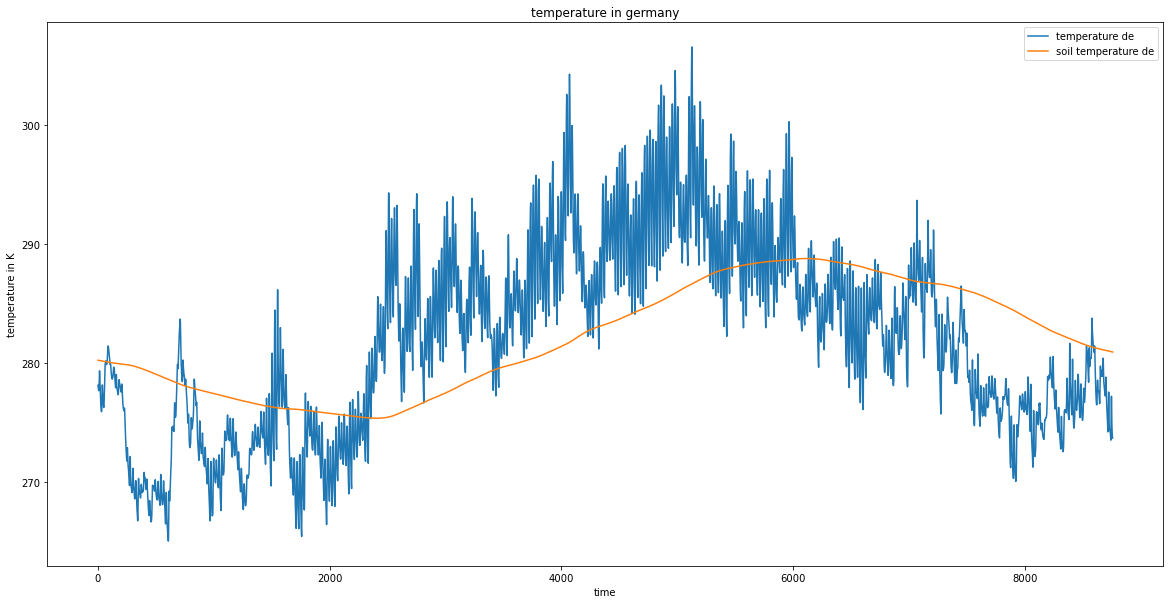

In [28]:
temp_de = ds["temperature"].sel(region="DE0 0 on")
soil_temp_de = ds["soil_temperature"].sel(region="DE0 0 on")
plt.figure(figsize=(20,10))
plt.plot(temp_de, label="temperature de")
plt.plot(soil_temp_de, label="soil temperature de")
plt.xlabel("time")
plt.ylabel("temperature in K")
plt.title("temperature in germany")
plt.legend()

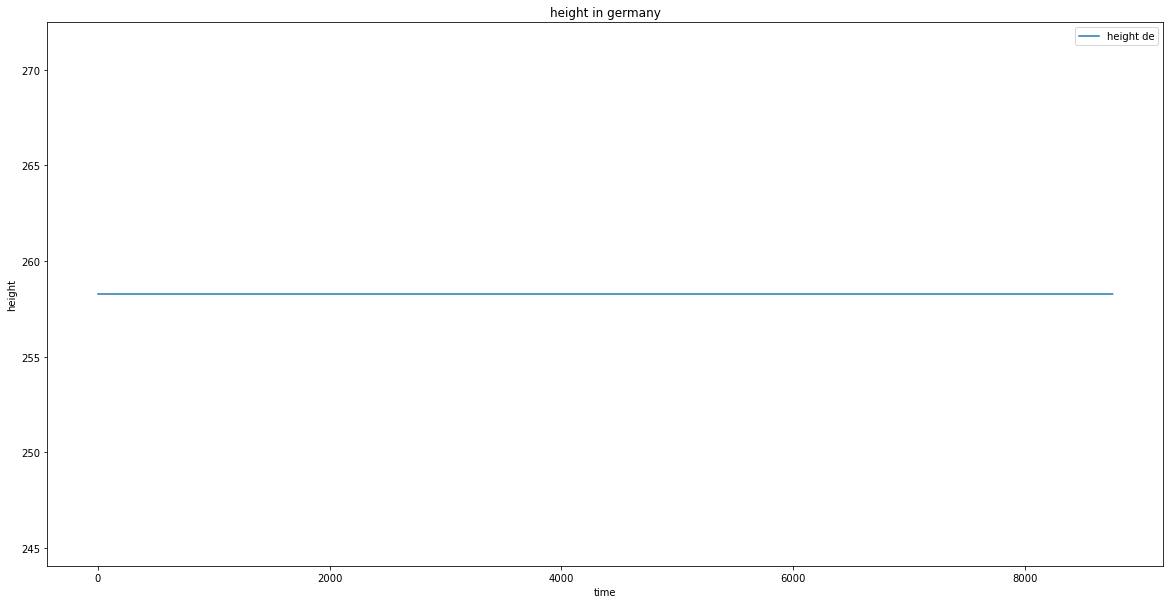

In [21]:
height_de = ds["height"].sel(region="DE0 0 on")
plt.figure(figsize=(20,10))
plt.plot(height_de, label="height de")
plt.xlabel("time")
plt.ylabel("height")
plt.title("height in germany")
plt.legend()

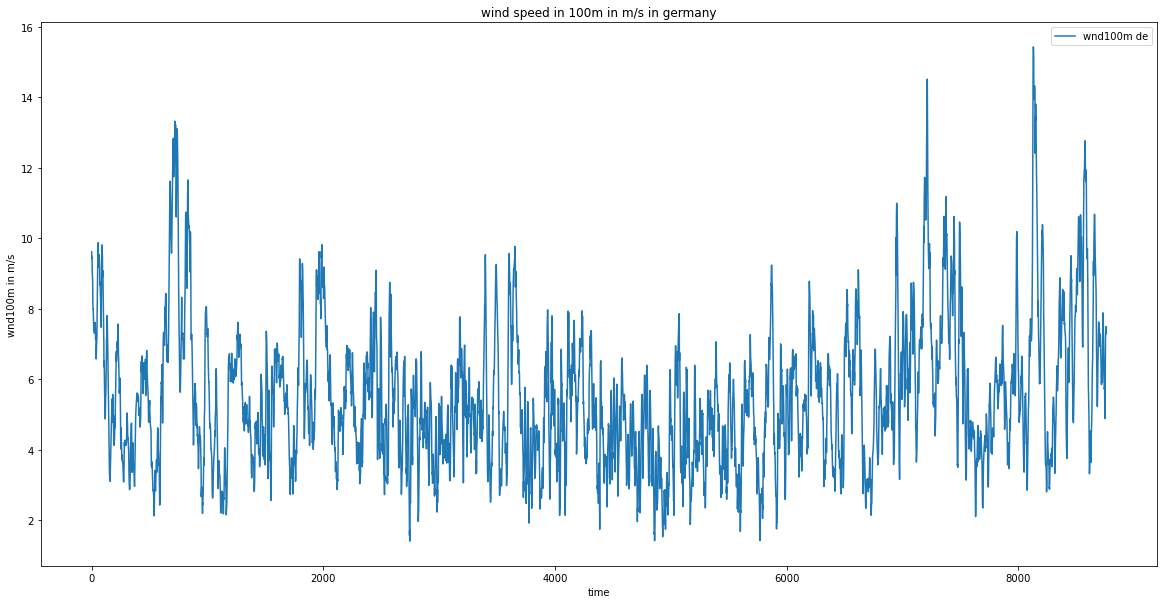

In [23]:
wnd100m_de = ds["wnd100m"].sel(region="DE0 0 on")
plt.figure(figsize=(20,10))
plt.plot(wnd100m_de, label="wnd100m de")
plt.xlabel("time")
plt.ylabel("wnd100m in m/s")
plt.title("wind speed in 100m in m/s in germany")
plt.legend()

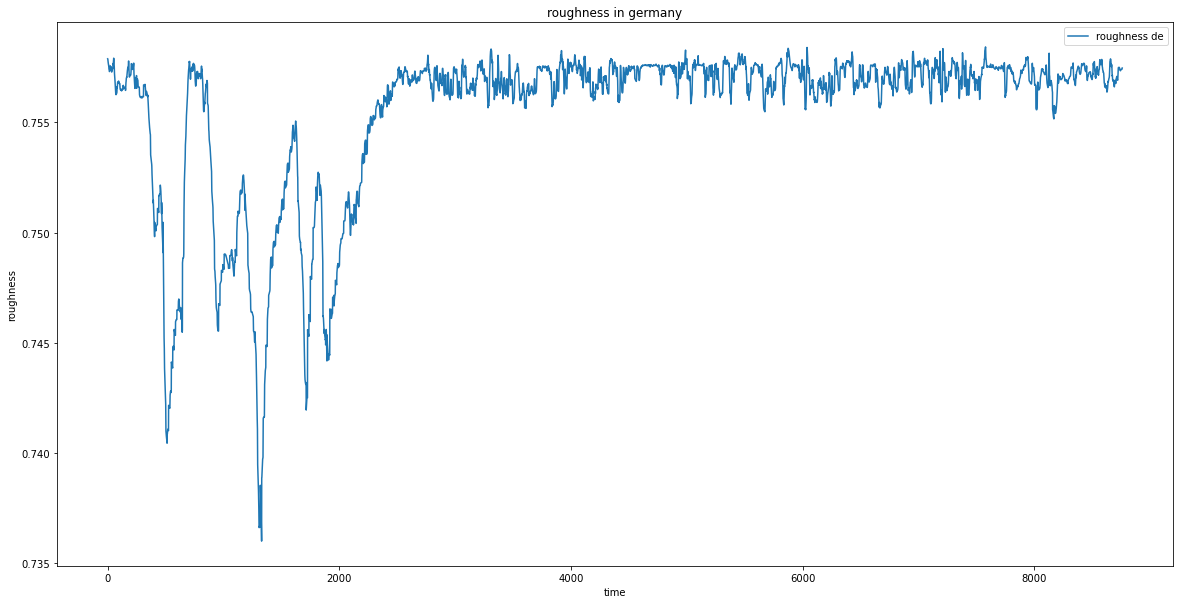

In [25]:
roughness_de = ds["roughness"].sel(region="DE0 0 on")
plt.figure(figsize=(20,10))
plt.plot(roughness_de, label="roughness de")
plt.xlabel("time")
plt.ylabel("roughness")
plt.title("roughness in germany")
plt.legend()

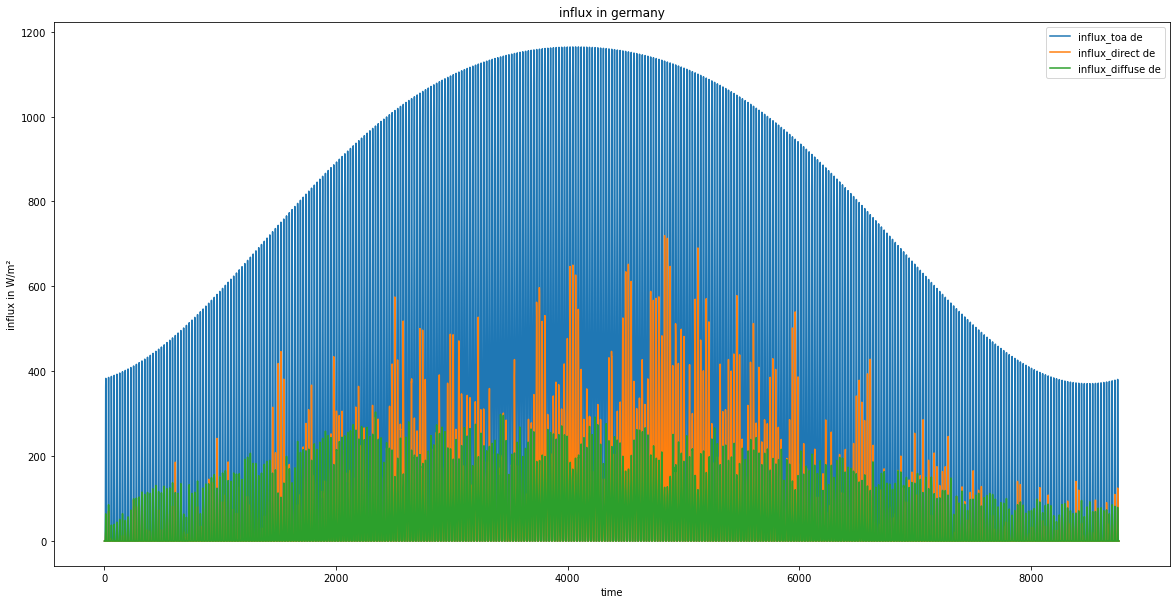

In [26]:
influx_toa_de = ds["influx_toa"].sel(region="DE0 0 on")
influx_direct_de = ds["influx_direct"].sel(region="DE0 0 on")
influx_diffuse_de = ds["influx_diffuse"].sel(region="DE0 0 on")

plt.figure(figsize=(20,10))
plt.plot(influx_toa_de, label="influx_toa de")
plt.plot(influx_direct_de, label="influx_direct de")
plt.plot(influx_diffuse_de, label="influx_diffuse de")
plt.xlabel("time")
plt.ylabel("influx in W/m²")
plt.title("influx in germany")
plt.legend()

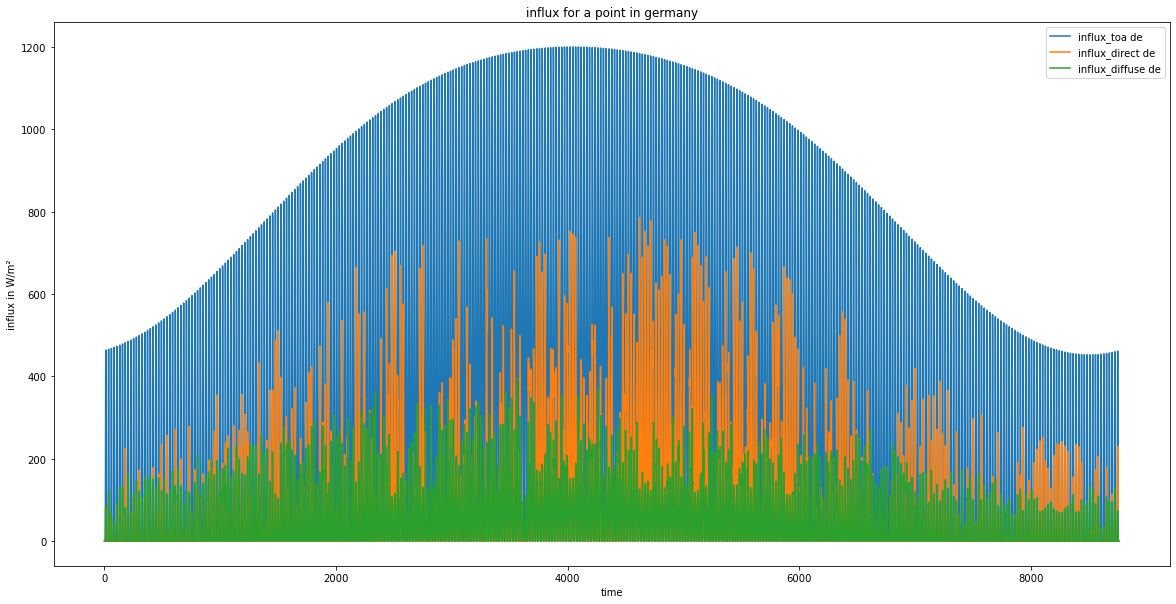

In [35]:
influx_toa_de_pt = era_data["influx_toa"].sel(x="7.8", y="47.7")
influx_direct_de_pt = era_data["influx_direct"].sel(x="7.8", y="47.7")
influx_diffuse_de_pt = era_data["influx_diffuse"].sel(x="7.8", y="47.7")

plt.figure(figsize=(20,10))
plt.plot(influx_toa_de_pt, label="influx_toa de")
plt.plot(influx_direct_de_pt, label="influx_direct de")
plt.plot(influx_diffuse_de_pt, label="influx_diffuse de")
plt.xlabel("time")
plt.ylabel("influx in W/m²")
plt.title("influx for a point in germany")
plt.legend()

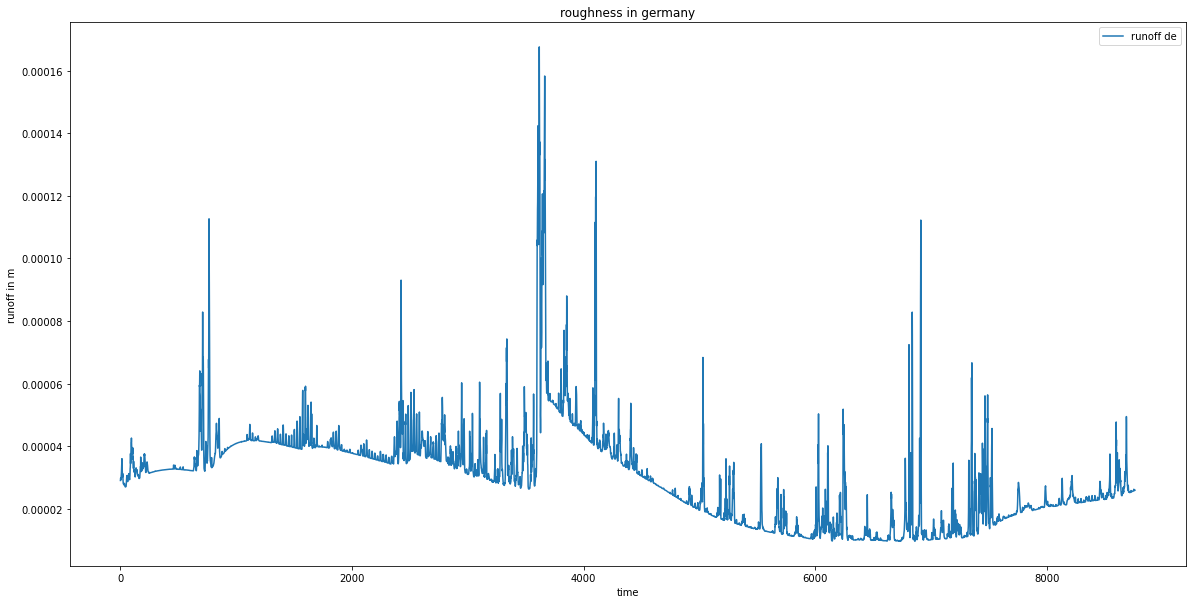

In [29]:
runoff_de = ds["runoff"].sel(region="DE0 0 on")
plt.figure(figsize=(20,10))
plt.plot(runoff_de, label="runoff de")
plt.xlabel("time")
plt.ylabel("runoff in m")
plt.title("roughness in germany")
plt.legend()